In [75]:
source('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/scripts/libraries_visuals.R')
source('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/scripts/libraries_analysis.R')

Registered S3 methods overwritten by 'ggtern':
  method           from   
  grid.draw.ggplot ggplot2
  plot.ggplot      ggplot2
  print.ggplot     ggplot2

--
Remember to cite, run citation(package = 'ggtern') for further info.
--


Attaching package: ‘ggtern’


The following object is masked from ‘package:gghighlight’:

    aes


The following objects are masked from ‘package:ggplot2’:

    aes, annotate, ggplot, ggplot_build, ggplot_gtable, ggplotGrob,
    ggsave, layer_data, theme_bw, theme_classic, theme_dark,
    theme_gray, theme_light, theme_linedraw, theme_minimal, theme_void


Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal


corrplot 0.92 loaded


Attaching package: ‘corrplot’


The following object is masked from ‘package:arm’:

    corrplot


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘patchwork’


The following object is ma

## Miami plot comparing our results and Ishigaki's for Healthy with cdr3-QTLs

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


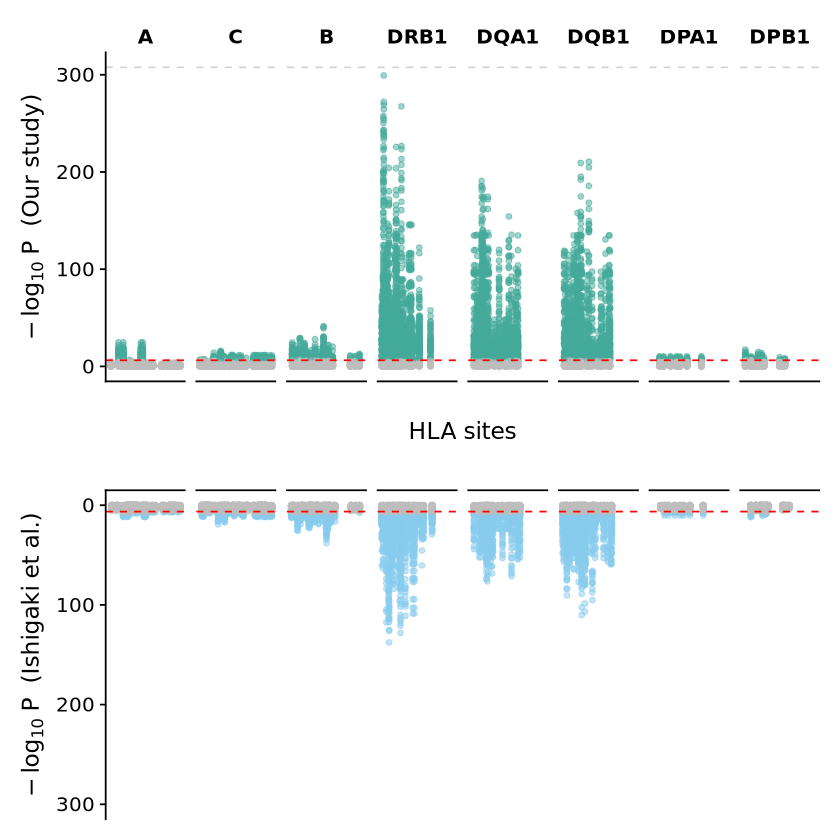

In [55]:
source('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/scripts/R_scripts/Miami_main_manovas.R')
pl_ours/pl

In [51]:
pl_both <- pl_ours / pl
ggsave('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/plots/miami_plots.pdf', pl_both)

Saving 6.67 x 6.67 in image



## Heapmap with variance explained for Healthy dataset

In [ ]:
drb1_variance <- manova_df_all %>% filter(gene == 'DRB1', length == '15') %>%
    select(pair, Pr..F., gene, site, length, position, Omnibus, model, P_val, replic) %>% 
    group_by(site, length, position, replic) %>% 
    reframe(full_omnibus = Omnibus[model == "full"],null_omnibus = Omnibus[model == "null"],var_explained = full_omnibus - null_omnibus,
           full_P = P_val[model == "full"],null_P = P_val[model == "null"]) %>%
    mutate(site = factor(as.numeric(site)), significance = ifelse(full_P >= 0.05, 'non_sig', 'sig'), 
           var_explained_to_plot = ifelse(significance == 'sig', var_explained, NA)) %>%
    arrange(site)
drb1_variance #%>% filter(omnibus_full > 0.05)

In [39]:
sites <- unique(pull(drb1_variance, site))
sites

[1] "10"  "104" "11"  "112" "12"  "120" "13"  "133" "14"  "140" "142" "149"
[13] "16"  "180" "181" "189" "233" "25"  "26"  "28"  "30"  "31"  "32"  "33" 
[25] "37"  "38"  "4"   "47"  "57"  "58"  "60"  "67"  "70"  "71"  "73"  "74" 
[37] "77"  "78"  "85"  "86"  "9"   "96"  "98"

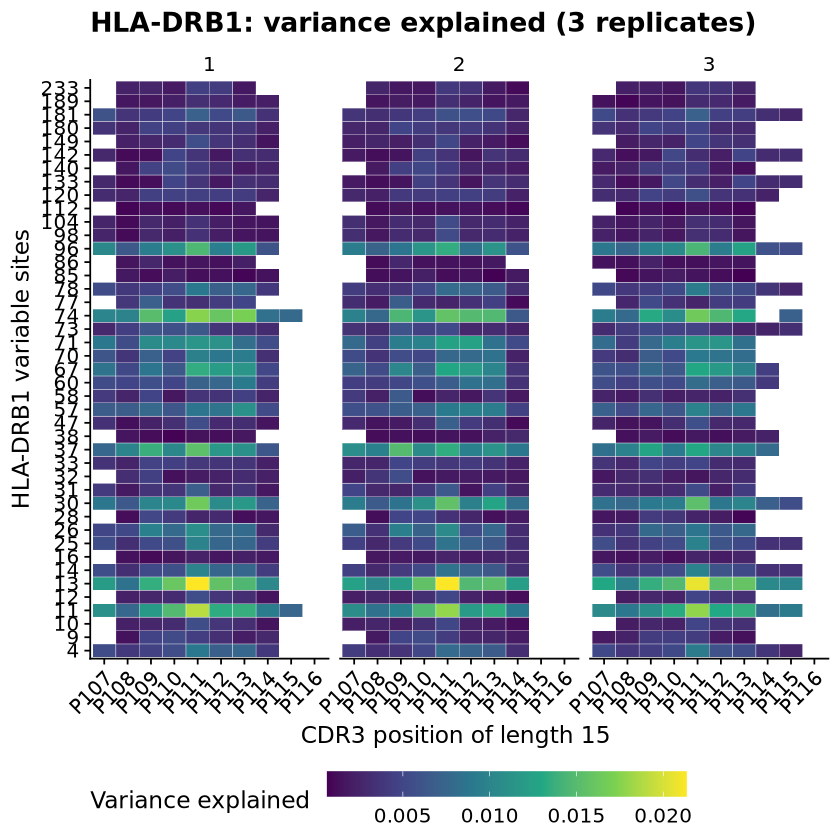

In [ ]:
heatmap_plot <- ggplot(drb1_variance, aes(x = position, y = site, fill = var_explained_to_plot)) +
  geom_tile(color = 'white', linetype = 1) +
  scale_fill_viridis_c(na.value = 'white') +
  theme_cowplot() +
  labs(title = "HLA-DRB1: variance explained (3 replicates)", x = "CDR3 position of length 15 ", y = "HLA-DRB1 variable sites", fill = 'Variance explained') +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), strip.background = element_rect(fill = "white")) +
  facet_wrap(~replic) +
  theme(legend.position = 'bottom') +
  guides(fill=guide_colourbar(barwidth=15))

heatmap_plot
ggsave('../plots/hla_DRB1_variance_explained.pdf',heatmap_plot, width = 12, height = 8)

In [7]:
hla_annotation <- read.csv('../data/TRB_samples/hla_annotations.csv', sep = ';')
hla_annotation <- hla_annotation %>% mutate(start = ifelse(gene %in% c('A','B','C'), start - 24, start - 29), end = ifelse(gene %in% c('A','B','C'), end - 24, end - 29))

In [5]:
drb1_annotated_dict <- list(Beta_domain = c(seq(13, 87)), Ig_like_C1_type = c(seq(97, 185)), Antigen_binding = c(57,61,81,82,93), 
                    Glycosylation = 19, Disulfid_bonds	= c(15,79,117,173), Phosphoserine = 237, Crosslinking = 225)

In [6]:
drb1 <- manova_df_all %>% filter(gene == 'DRB1') %>% select('Pr..F.','gene','site','length','position') %>% 
    mutate(significant = ifelse((Pr..F. <= bonf), 'yes', 'no'))
drb1_ref <- as.data.frame(do.call(cbind, drb1_annotated_dict)) %>% 
    pivot_longer(names_to = 'feature', values_to = 'site', cols = 1:7) %>% 
    distinct()
drb1_annotated <- left_join(drb1, drb1_ref, by = 'site') %>%
    mutate(interest = ifelse(site %in% c(37,86), 'yes', 'no'), 
           significant = ifelse((Pr..F. <= bonf), 'yes', 'no'))
drb1_site37_site86 <- drb1 %>% filter(site == 37 | site == 86, significant == 'yes') %>% select(-significant)

Warning message in (function (..., deparse.level = 1) :
“number of rows of result is not a multiple of vector length (arg 1)”
Warning message in left_join(drb1, drb1_ref, by = "site"):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 155 of `x` matches multiple rows in `y`.
ℹ Row 121 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship = "many-to-many"` to silence this warning.”


### Visualisation of MANOVA in gene-wise manner with annotations

Warning message in geom_point(data = drb1_site37_site86, aes(x = site, y = -log10(Pr..F.), :
“Ignoring unknown aesthetics: label”


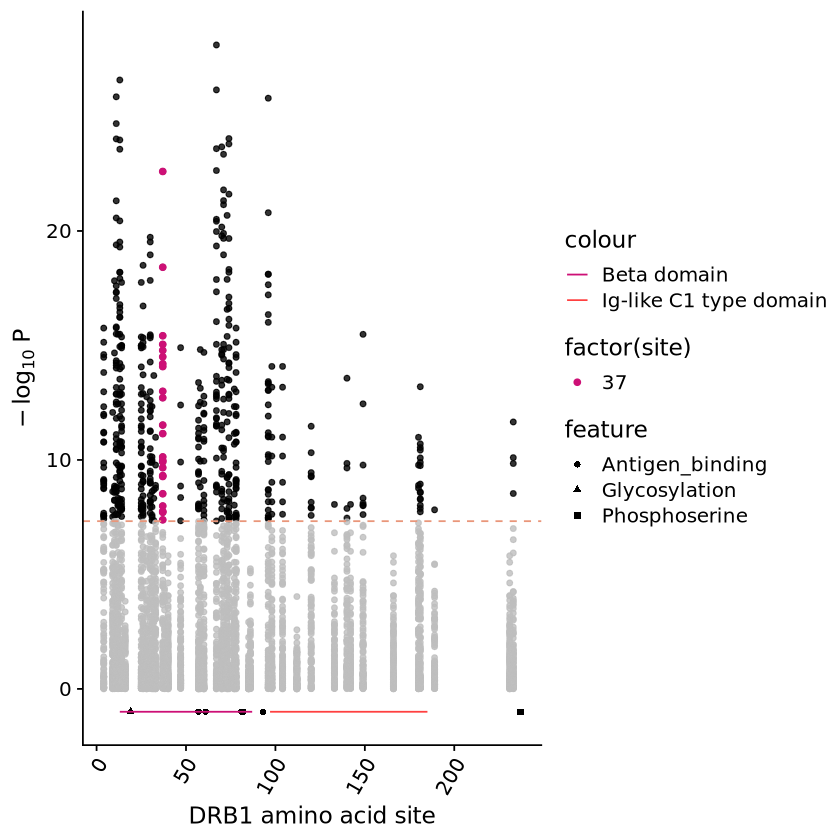

In [28]:
pl_drb1 <- ggplot() + 
    geom_point(data = drb1, aes(x = site, y = -log10(Pr..F.), colour = significant), show.legend = FALSE, alpha=0.8, size=1.3) +
    scale_color_manual(values = c('yes' = 'black', 'no' = 'grey')) +
    labs(x = "DRB1 amino acid site", y = expression(paste(-log[10], " ", P))) + 
    new_scale_color() + 
    geom_point(data = drb1_site37_site86, aes(x=site, y = -log10(Pr..F.), color = factor(site), label = factor(site))) +
    scale_color_manual(values = c('37' = 'deeppink3')) +
    geom_point(data = drb1_ref %>% filter(feature %in% c('Antigen_binding', 'Glycosylation', 'Phosphoserine')), 
              aes(x = site, y = -1, shape = feature)) +
    #scale_shape_manual(values = ifelse("Antigen_binding" = 13, 'no' = 23) , guide = "none" , drop = FALSE, na.translate = TRUE) +
    #scale_color_viridis_d() +
    geom_hline(yintercept= - log10(bonf), linetype="dashed", color = "darksalmon") +
    theme(legend = 'none') +
    theme_cowplot() +
    theme(axis.text.x = element_text(angle = 60, hjust = 1), strip.background = element_rect(fill = "white")) +
    new_scale_color() + 
    geom_segment(aes(x = 13, xend = 87, y=-1, yend = -1, colour = 'Beta domain')) +
    geom_segment(aes(x = 97, xend = 185, y=-1, yend = -1, colour = 'Ig-like C1 type domain')) +
    scale_color_manual(values = c('Beta domain' = 'deeppink3', 'Ig-like C1 type domain' = 'brown1')) 
    #theme(legend.position = "bottom", legend.text = 'Domains') +
    

pl_drb1
               
ggsave('../plots/trb_drb1_annotated.jpg',pl_drb1, width = 10, height = 4)

### If removing correlated alleles has effect on the HEALTHY MANOVA 

In [5]:
hla_genes <- c('A', 'C', 'B','DRB1','DQA1','DQB1','DPA1', 'DPB1')

In [34]:
our_manova <- na.omit(fread('../HEALTHY/manova_results_wo_correlation_in_PCA.tsv')) %>% 
    separate(pair, into = c('HLA', 'Site_hla', 'Length_cdr3', 'Position_cdr3'), sep = ':', remove = FALSE) %>%
    mutate(Site_hla = as.integer(Site_hla))

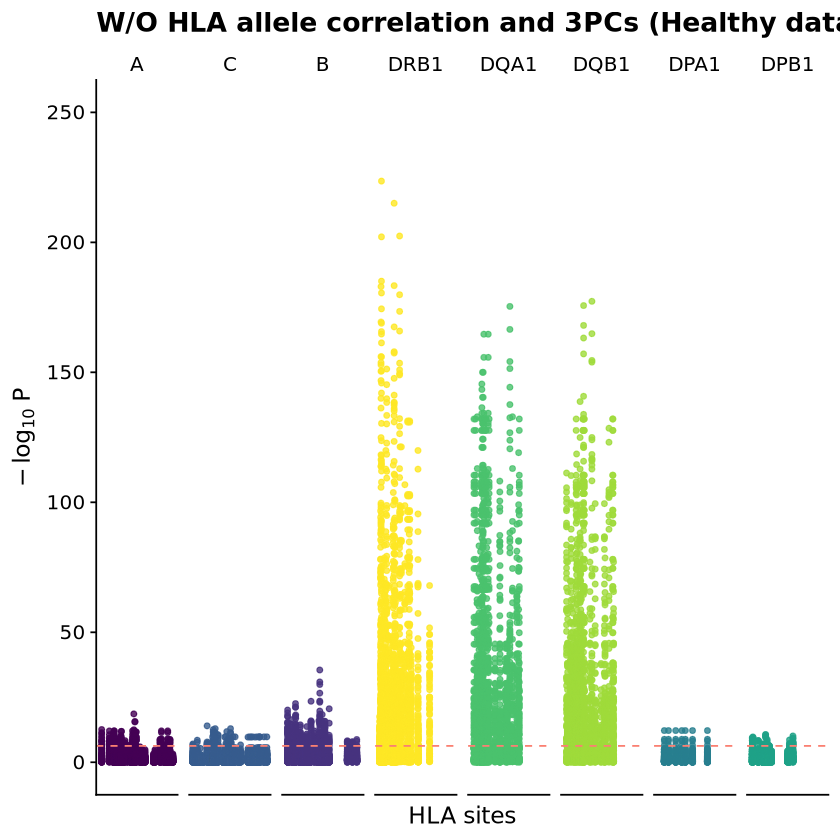

In [49]:
pl_ours <- ggplot() +
    geom_point(data = our_manova, aes(x = Site_hla, y = -log10(Pr..F.), color=as.factor(HLA)), alpha=0.8, size=1.3, show.legend = FALSE) +
    scale_color_viridis_d('inferno') +
    #scale_x_discrete(breaks = as.integer(seq(0,300, length.out = 5))) +
    labs(x = "HLA sites", y = expression(paste(-log[10], " ", P))) +
    geom_hline(yintercept= - log10(bonf), linetype="dashed", color = "salmon") +
    theme(legend.position = "none") +
    theme_cowplot() +
    facet_grid(~factor(HLA, levels = hla_genes), space = "free") +
    theme(axis.text.x = element_blank(), strip.background = element_rect(fill = "white"),  
          axis.ticks.x=element_blank()) +
    ggtitle('W/O HLA allele correlation and 3PCs (Healthy dataset)') +
    ylim(0,250)
    #geom_segment(data = hla_annotation, aes(x = start, xend = end, y=-0.01, yend=-0.01), color = 'blue', label = NA)
pl_ours
ggsave('../plots/manhattan_plot_wo_correlation_alleles_3PCs.jpg',pl_ours, width = 10, height = 4)


In [38]:
our_manova_prev <- na.omit(fread('../HEALTHY/manova_results.tsv')) %>% 
    separate(pair, into = c('HLA', 'Site_hla', 'Length_cdr3', 'Position_cdr3'), sep = ':', remove = FALSE) %>%
    mutate(Site_hla = as.integer(Site_hla))

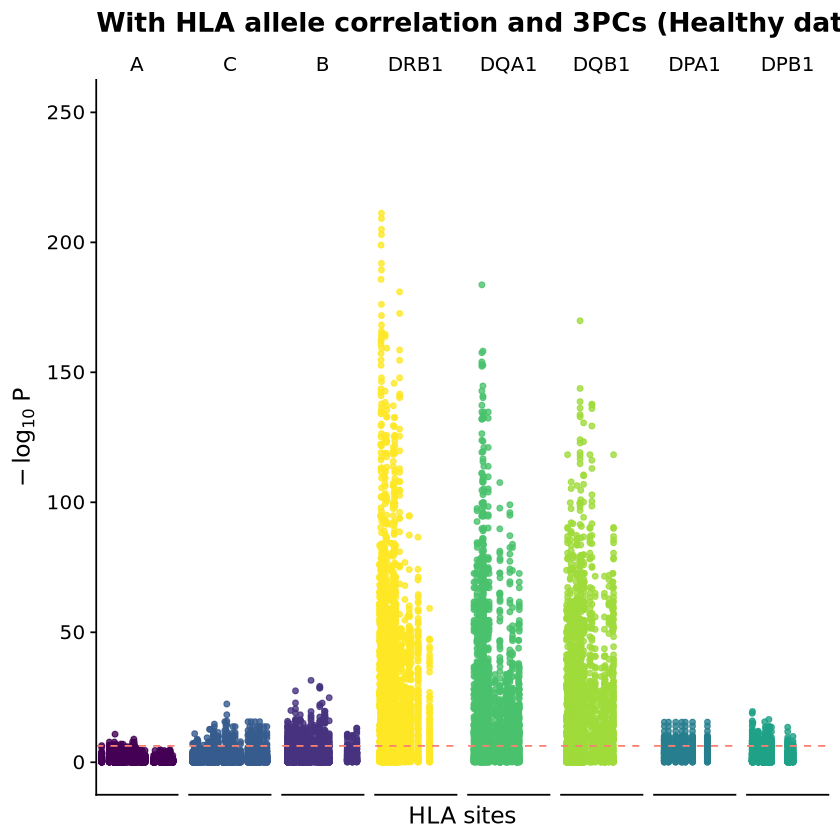

In [50]:
pl_ours_prev <- ggplot() +
    geom_point(data = our_manova_prev, aes(x = Site_hla, y = -log10(Pr..F.), color=as.factor(HLA)), alpha=0.8, size=1.3, show.legend = FALSE) +
    scale_color_viridis_d('inferno') +
    #scale_x_discrete(breaks = as.integer(seq(0,300, length.out = 5))) +
    labs(x = "HLA sites", y = expression(paste(-log[10], " ", P))) +
    geom_hline(yintercept= - log10(bonf), linetype="dashed", color = "salmon") +
    theme(legend.position = "none") +
    theme_cowplot() +
    facet_grid(~factor(HLA, levels = hla_genes), space = "free") +
    theme(axis.text.x = element_blank(), strip.background = element_rect(fill = "white"),  
          axis.ticks.x=element_blank()) +
    ggtitle('With HLA allele correlation and 3PCs (Healthy dataset)') +
    ylim(0,250)
    #geom_segment(data = hla_annotation, aes(x = start, xend = end, y=-0.01, yend=-0.01), color = 'blue', label = NA)
pl_ours_prev
ggsave('../plots/manhattan_plot_as_previously_done.jpg',pl_ours_prev, width = 10, height = 4)

### If removing correlated alleles and using 9 PCs has effect on the HEALTHY MANOVA

In [51]:
our_new_manova <- na.omit(fread('../HEALTHY/manova_results_wo_correlation_in_alleles_using_9_PCs.tsv')) %>% 
    separate(pair, into = c('HLA', 'Site_hla', 'Length_cdr3', 'Position_cdr3'), sep = ':', remove = FALSE) %>%
    mutate(Site_hla = as.integer(Site_hla))

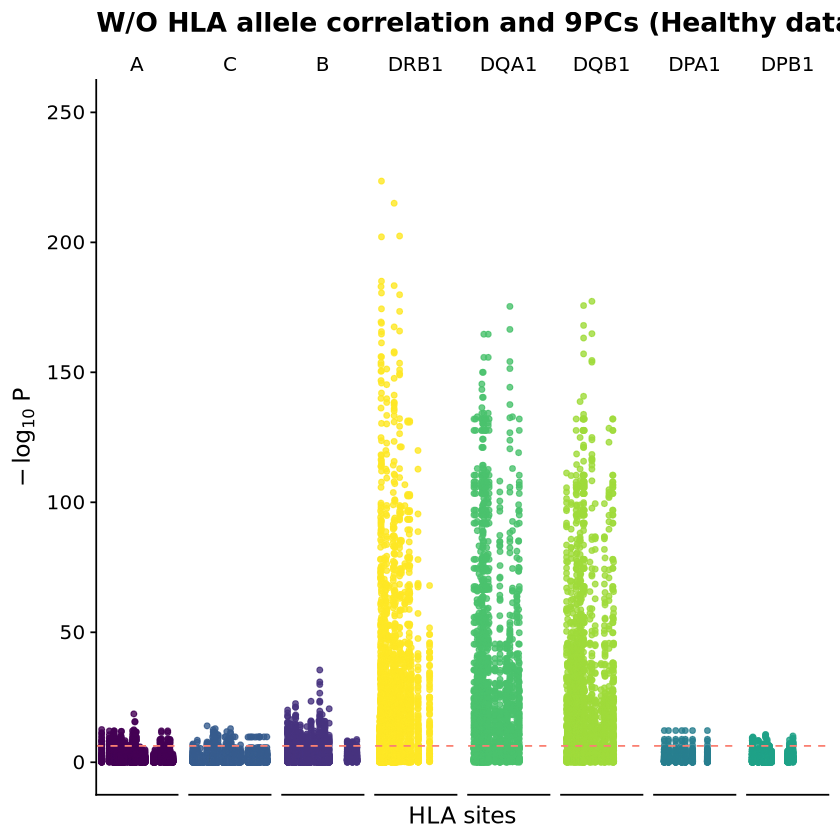

In [53]:
pl_ours_9PCs <- ggplot() +
    geom_point(data = our_new_manova, aes(x = Site_hla, y = -log10(Pr..F.), color=as.factor(HLA)), alpha=0.8, size=1.3, show.legend = FALSE) +
    scale_color_viridis_d('inferno') +
    #scale_x_discrete(breaks = as.integer(seq(0,300, length.out = 5))) +
    labs(x = "HLA sites", y = expression(paste(-log[10], " ", P))) +
    geom_hline(yintercept= - log10(bonf), linetype="dashed", color = "salmon") +
    theme(legend.position = "none") +
    theme_cowplot() +
    facet_grid(~factor(HLA, levels = hla_genes), space = "free") +
    theme(axis.text.x = element_blank(), strip.background = element_rect(fill = "white"),  
          axis.ticks.x=element_blank()) +
    ggtitle('W/O HLA allele correlation and 9PCs (Healthy dataset)') +
    ylim(0,250)
    #geom_segment(data = hla_annotation, aes(x = start, xend = end, y=-0.01, yend=-0.01), color = 'blue', label = NA)
pl_ours_9PCs
ggsave('../plots/manhattan_plot_wo_correlation_9PCs.jpg',pl_ours_9PCs, width = 10, height = 4)


### Visualise MAIN MANOVA in Downsampled CDR3

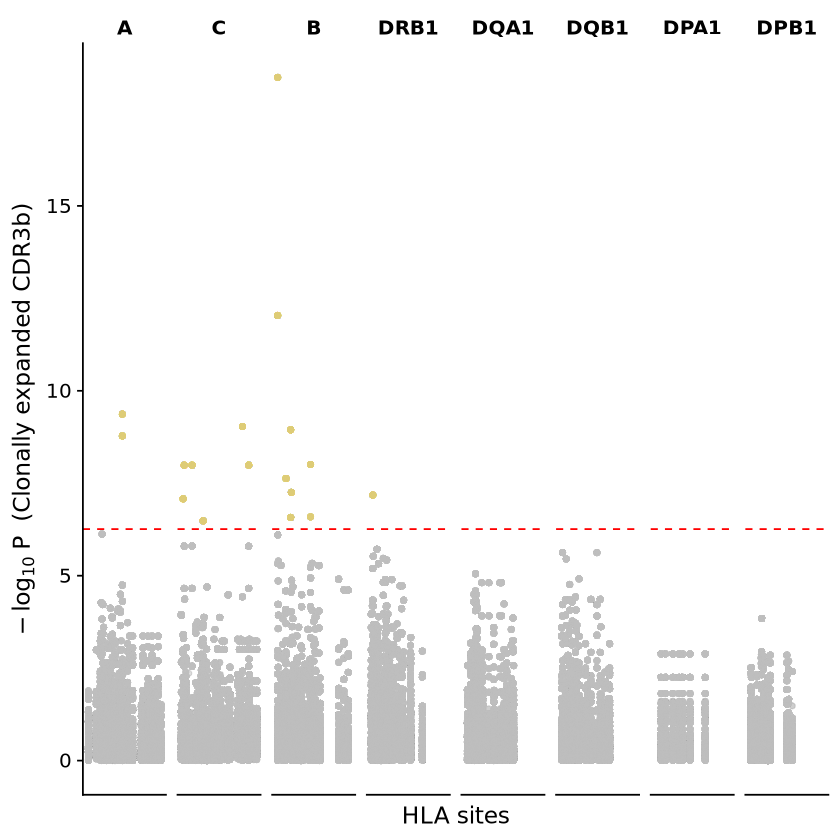

In [339]:
manova_downsampled <- fread('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/CDR3_downsampling_experiment/expansion/60000/60000_manova.tsv')
bonf <- 0.01 / uniqueN(manova_downsampled$pair)
hla_genes <- c('A', 'C', 'B','DRB1','DQA1','DQB1','DPA1', 'DPB1')
manova_downsampled <- na.omit(manova_downsampled) %>% rename(Pvalue = grep('Pr', names(manova_downsampled), value = TRUE)) %>% 
    mutate(Site_hla = as.integer(Site_hla))
pl <- ggplot(manova_downsampled) +
    geom_point(aes(x = Site_hla, y = -log10(Pvalue), color = ifelse(Pvalue < bonf, 'significant', ' ')), 
        alpha=0.5, size=1.3, show.legend = FALSE) +
    scale_color_manual(values = c('significant' = '#DDCC77', ' ' = 'grey')) +
    labs(x = "HLA sites", y = expression(paste(-log[10], " ", P, "  (Clonally expanded CDR3b)"))) +
    geom_hline(yintercept= - log10(bonf), linetype="dashed", color = "red") +
    theme(legend.position = "none") +
    theme_cowplot() +
    facet_grid(~factor(HLA, levels = hla_genes), space = "free") +
    theme(axis.text.x = element_blank(), 
        #axis.title.x = element_text(vjust = -1, margin = margin(t = 15)),
        strip.background = element_rect(fill = "white"),
        strip.text.x = element_text(size = 12, face = 'bold'),
        axis.ticks.x = element_blank()) 
pl

In [ ]:
ggsave('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/plots/downsampled_expanded_60K_manhattan.pdf', pl, dpi = 600, width = 10, height = 10,units = 'cm')

### Comparing OUR Manovas with IRT and Groups or Without Groups

Warning message:
“Removed 26880 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 26880 rows containing missing values or values outside the scale range (`geom_point()`).”


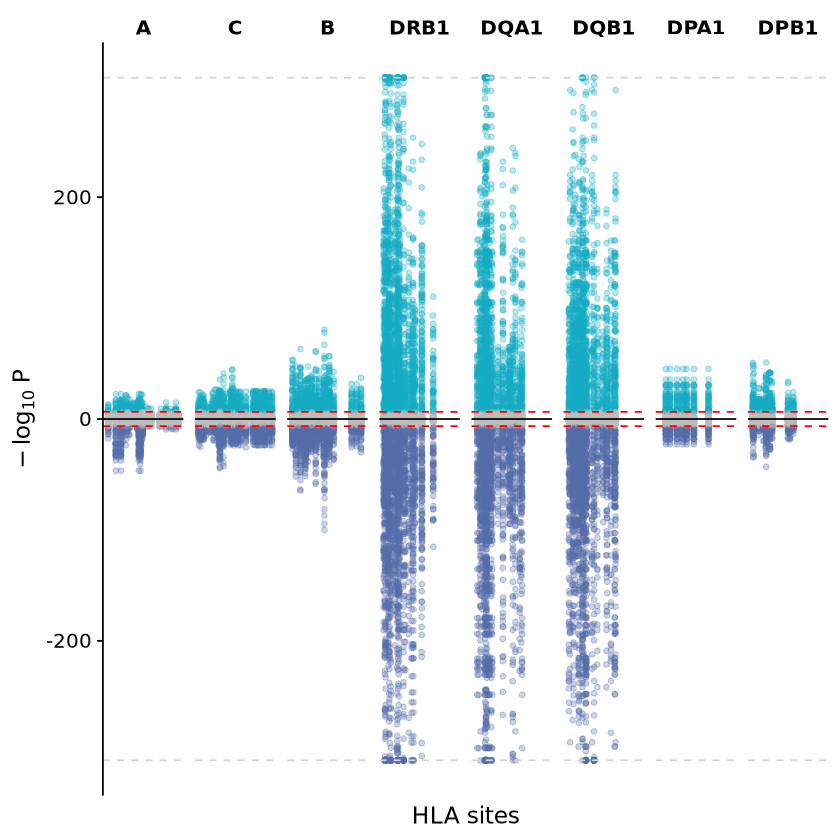

In [13]:
manova_results <- fread('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/manova_results/irt_freq_unique/Main_manova_irt_freq_with_groups.csv')
manova_prev <- fread('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/manova_results/main_manova_as_in_Ishigaki_removing_90_corr.tsv')

hla_genes = c('A','C','B','DRB1','DQA1', 'DQB1', 'DPA1','DPB1')
smallest_number <- .Machine$double.xmin
colnames(manova_results)[grep("Pr", colnames(manova_results))] <- "Pvalue"
colnames(manova_prev)[grep("Pr", colnames(manova_prev))] <- "Pvalue"

our_manova <- na.omit(manova_results) %>% 
    separate(pair, into = c('HLA', 'Site_hla', 'Length_cdr3', 'Position_cdr3'), sep = '_', remove = FALSE) %>%
    mutate(Site_hla = as.integer(Site_hla), Pvalue = ifelse(Pvalue == 0, smallest_number, Pvalue)) 
manova_prev <- manova_prev %>% mutate(Pvalue = ifelse(Pvalue == 0, smallest_number, Pvalue))
bonf <- 0.01/nrow(our_manova)

both_datasets <- our_manova %>% 
    mutate(Dataset = 'Updated with Groups') %>% 
    rbind(manova_prev %>% mutate(Dataset = 'Without Groups'))

plots_both_one_axis <- ggplot() +
    geom_point(data = our_manova, aes(x = Site_hla, y = -log10(Pvalue), color = ifelse(Pvalue < bonf, 'significant', ' ')), 
               alpha=0.3, size=1.3, show.legend = FALSE) +
    scale_color_manual(values = c('significant' = '#15ABC2', ' ' = 'grey')) +
    new_scale_color() +
    geom_point(data = manova_prev, aes(x = Site_hla, y = log10(Pvalue), color=ifelse(Pvalue < bonf, 'significant', ' ')), 
               alpha=0.3, size=1.3, show.legend = FALSE) +
    scale_color_manual(values = c('significant' = '#566EA9', ' ' = 'grey')) +
    #scale_x_discrete(breaks = as.integer(seq(0,300, length.out = 5))) +
    labs(x = 'HLA sites', y = expression(paste(-log[10], " ", P))) +
    geom_hline(yintercept=  -log10(bonf), linetype="dashed", color = "red") +
    geom_hline(yintercept=  -log10(smallest_number), linetype="dashed", color = "lightgrey") +
    geom_hline(yintercept= 0, 
        linetype="solid", color = "black") +
    geom_hline(yintercept= log10(bonf), linetype="dashed", color = "red") +
    geom_hline(yintercept=  log10(smallest_number), linetype="dashed", color = "lightgrey") +
    theme(legend.position = "none") +
    theme_cowplot() +
    facet_grid(~factor(HLA,levels = hla_genes), space = "free") +
    theme(axis.text.x = element_blank(), 
        strip.background = element_rect(fill = "white"),
        strip.text.x = element_text(size = 12, face = 'bold'),
        axis.line.x = element_blank(),
        axis.ticks.x = element_blank(),
        )
plots_both_one_axis
ggsave('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/plots/our_manovas_with_and_without_groups.pdf', 
    plots_both_one_axis, width = 10, height = 5, dpi = 600)

# Visualisation of Conditional haplotype analysis

In [156]:
smallest_number <- .Machine$double.xmin
n_rounds <- 4
hla_genes <- c('DRB1', 'DQA1', 'DQB1')

first <- TRUE
for (phenotype in c('I', 'H', 'Both')){
    if (phenotype == 'Both'){
        path_to_phenotype <- '/with_groups/both/'
    } else {
        path_to_phenotype <- paste0(phenotype,'/')
    }
    for (hla_gene in hla_genes){

        n_tests <- 0
        for (i in seq(1,n_rounds)){
            file_path <- paste0('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/conditional_analysis/',path_to_phenotype,hla_gene,'_conditional_round_',i,'.tsv')
            n_df <- nrow(fread(file_path))
            n_tests <- n_tests + n_df/2
        }
        for (i in seq(1,n_rounds)){
            file_path <- paste0('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/conditional_analysis/',path_to_phenotype,hla_gene,'_conditional_round_',i,'.tsv')
            df_rounds <- na.omit(fread(file_path)) %>% 
                filter(Pvalue <= 0.05/n_tests) %>%
                group_by(Length_cdr3) %>%
                filter(Pvalue == min(Pvalue)) %>%
                filter(variance_explained == max(variance_explained)) %>%
                rowwise() %>%
                mutate(Site_hla = as.numeric(unlist(strsplit(condition, '_'))[[i+1]]), Cond_round = i,
                    Dataset = ifelse(phenotype == 'I', 'IBD', ifelse(phenotype == 'H', 'Healthy', 'Combined')), 
                    HLA = hla_gene, Pvalue = ifelse(Pvalue == 0, smallest_number, Pvalue)) %>%
                ungroup() %>%
                dplyr::select(Dataset, HLA, Length_cdr3, IMGT, Pvalue, Omnibus, condition, Site_hla, Cond_round) %>% 
                rename('variance_explained' = 'Omnibus') %>% 
                unique()
            if (first){
                df_rounds_all <- df_rounds
                first <- FALSE
            } else {
                df_rounds_all <- rbind(df_rounds_all, df_rounds)
            }
        }
        
}}

In [157]:
df_combined <- na.omit(fread('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/manova_results/main_manova_as_in_Ishigaki.tsv')[, 
    Length_cdr3 := paste0('L', Length_cdr3)][HLA %in% c('DQA1', 'DQB1', 'DRB1')])  %>% 
    rename('Pvalue' = grep('Pr', names(.), value = TRUE), 'IMGT' = 'Position_cdr3') %>% 
    group_by(HLA, Length_cdr3) %>%  
    filter(Pvalue == min(Pvalue)) %>% 
    filter(variance_explained == max(variance_explained))%>%
    mutate(Dataset = 'Combined', Cond_round = 0, condition = unique(Site_hla)) %>%
    ungroup() %>%
    dplyr::select(HLA, Dataset, Length_cdr3, IMGT, Pvalue, variance_explained, Site_hla, Cond_round, condition) %>%
    unique()


df_healthy <- na.omit(fread('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/HEALTHY/manova_results_wo_correlation_in_PCA.tsv'))
df_healthy <- df_healthy[,
    c('HLA', 'Site_hla', 'Length_cdr3', 'IMGT'):= tstrsplit(pair,':')][, 
    Length_cdr3 := paste0('L', Length_cdr3)][HLA %in% c('DQA1', 'DQB1', 'DRB1')] %>% 
    rename('Pvalue' = grep('Pr', names(df_healthy), value = TRUE)) %>% 
    group_by(HLA, Length_cdr3) %>% unique() %>% 
    filter(Pvalue == min(Pvalue)) %>% 
    filter(variance_explained == max(variance_explained))%>%
    mutate(Dataset = 'Healthy', Cond_round = 0, condition = unique(Site_hla)) %>%
    ungroup() %>%
    dplyr::select(HLA, Dataset, Length_cdr3, IMGT, Pvalue, variance_explained, Site_hla, Cond_round, condition) %>% 
     unique()

df_ibd <- na.omit(fread('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/IBD/manova_results_downsampled_wo_correlation_in_alleles_using_3_PCs.tsv'))
df_ibd <- df_ibd[,
    c('HLA', 'Site_hla', 'Length_cdr3', 'IMGT'):= tstrsplit(pair,':')][, 
    Length_cdr3 := paste0('L', Length_cdr3)][HLA %in% c('DQA1', 'DQB1', 'DRB1')] %>% 
    rename('Pvalue' = grep('Pr', names(df_ibd), value = TRUE)) %>% 
    group_by(HLA, Length_cdr3) %>% unique() %>% 
    filter(Pvalue == min(Pvalue)) %>% 
    filter(variance_explained == max(variance_explained)) %>%
    mutate(Dataset = 'IBD', Cond_round = 0, condition = unique(Site_hla)) %>%
    ungroup() %>%
    dplyr::select(HLA, Dataset, Length_cdr3, IMGT, Pvalue, variance_explained, Site_hla, Cond_round, condition) %>% 
    unique()

df_all_combined <- rbind(df_rounds_all, df_combined, df_healthy, df_ibd)

In [158]:
cdr3_qtl_results <- df_all_combined %>% 
    group_by(Dataset, HLA, Site_hla) %>% 
    mutate(n_occur = n(), Site_hla = as.numeric(Site_hla), Pvalue = ifelse(Pvalue == 0, smallest_number, Pvalue)) %>% 
    ungroup() %>% 
    filter(n_occur > 1) 

In [204]:
fwrite(cdr3_qtl_results, '/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/conditional_analysis/cdr3_qtl_results.tsv', sep = '\t')

In [133]:
cdr3_qtl_results <- fread('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/conditional_analysis/cdr3_qtl_results.tsv')

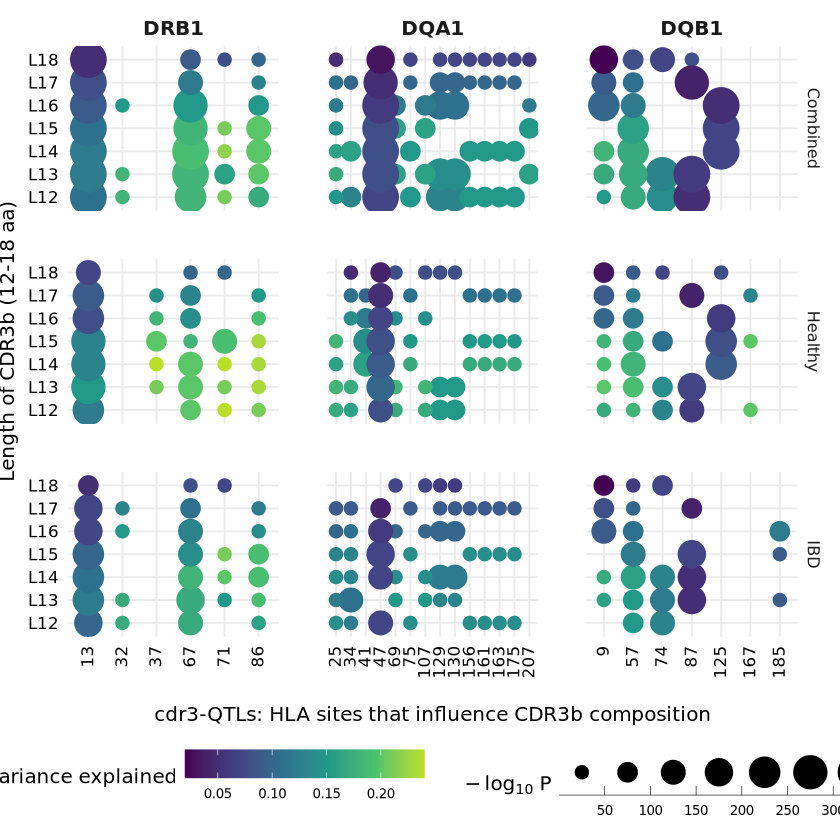

In [141]:
pl <- ggplot(cdr3_qtl_results[n_occur > 2], aes(x = factor(Site_hla), y = Length_cdr3, 
    size = -log10(Pvalue), 
    color = round(variance_explained, 2))) + 
geom_point() + 
facet_grid(Dataset ~ factor(HLA, levels = hla_genes), scales = 'free_x') + 
scale_color_viridis_c(end = 0.9, n.breaks = 8) + 
theme_minimal() + 
theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
labs(x = 'cdr3-QTLs: HLA sites that influence CDR3b composition', 
    y = 'Length of CDR3b (12-18 aa)', 
    size = expression(paste(-log[10], " ", P)), 
    color = 'Variance explained') + 
scale_size_binned(range = c(1,10), n.breaks = 6) + 
theme(legend.position = 'bottom',
    strip.text.x = element_text(size = 12, face = 'bold'), 
    axis.text.x = element_text(size = 10, hjust = 1, vjust =  0.4,  color = 'black'),
    axis.text.y = element_text(size = 10, hjust = 1, color = 'black'),
    axis.title.x = element_text(vjust = -0.3, margin = margin(t = 15)),
    axis.title.y = element_text(vjust = 3, margin = margin(t = 15)), 
    legend.text = element_text(size = 8),
    legend.box = "horizontal",
    panel.spacing = unit(2, "lines")) +
guides(color=guide_colourbar(barwidth = 10))

pl

In [88]:
ggsave(paste0('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/plots/CDR3_QTLs_all_datasets_length.pdf'), 
    pl, width = 33, height = 30, dpi = 600, units = 'cm')

### Chunk below needs some adjustments

In [ ]:
df_combined_all <- rbind(df_combined_all, df_rounds_all)
df_combined_all <- df_combined_all %>% mutate(Site_hla = as.numeric(Site_hla), Pvalue = ifelse(Pvalue == 0, smallest_number, Pvalue))
df_var <- df_combined_all %>% group_by(HLA, Dataset) %>% mutate(max_var = max(variance_explained)) %>%
    dplyr::select(Dataset, HLA, max_var) %>% 
    unique()
pl_var <- ggplot(data = df_var %>% filter(HLA == 'DQA1'), aes(x = max_var, y = Dataset, fill = Dataset)) +
    geom_col(width = 0.4, show.legend = FALSE) +
    geom_text(aes(label = round(max_var, 3)), color = "white", size = 4, hjust = 1.2, show.legend = FALSE) +
    scale_fill_viridis_d(begin = 0, end = 0.8, direction = -1) +
    theme_void()

pl_dots <- ggplot(df_combined_all %>% filter(HLA == 'DQA1'), aes(x = factor(Site_hla), y = Dataset, size = -log10(Pvalue))) + 
    scale_size_binned(n.breaks = 5, range = c(1, 10)) +
    geom_point(aes(color = Dataset)) +
    scale_color_viridis_d(end = 0.8, direction = -1) +
    theme_cowplot() +
    labs(x = paste0('HLA-DQA1 sites'), y = ' ', size = expression(-log[10](Pvalue))) +
    theme(legend.box = "horizontal", legend.position = "bottom", legend.key.width = unit(1, "cm"),
        panel.background = element_rect(fill = "#c4f3e7"), axis.text.x = element_text(angle = 90, hjust = 1))

pl_both <- pl_dots +  pl_var
pl_both

ggsave(paste0('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/plots/CDR3_QTLs_DQA1_datasets.png'), 
    pl_both, width = 9, height = 7)

pl <- ggplot(df_combined_all, aes(x = factor(Site_hla), y = phenotype, size = Pvalue)) + 
    geom_point() + 
    facet_wrap(~ Length_cdr3 +  hla_gene, scales = 'free', ncol = 3) + 
    scale_color_viridis_d(end = 0.8) + 
    theme_minimal() + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
    labs(x = 'CDR3-QTLs - HLA sites that influence CDR3 composition', y = 'Datasets', size = 'Variance explained', color = 'Phenotype') + 
    scale_size_continuous(range = c(1,10)) + 
    theme(legend.position = 'bottom') 
ggsave('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/plots/conditional_analysis_round_4.png', pl, width = 10, height = 30,)

### Visualise GWAS HLA sites in UC and CD

Warning message in eval(jsub, SDenv, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(jsub, SDenv, parent.frame()):
“NAs introduced by coercion”


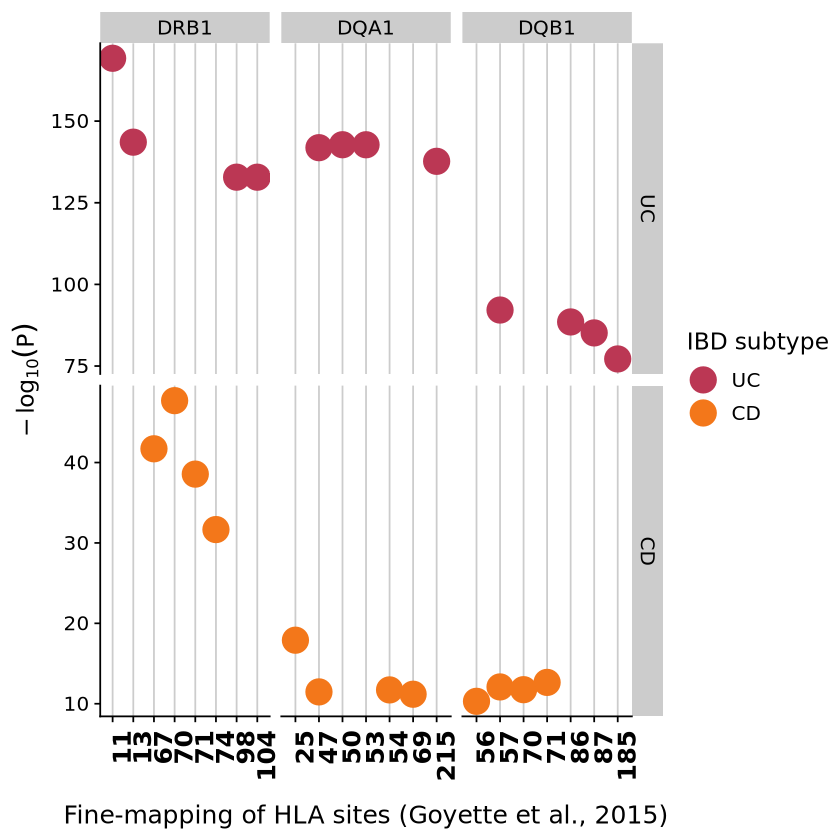

In [ ]:
library(readxl)
first <- TRUE
hla_genes <- c('DRB1', 'DQA1', 'DQB1')
for (hla_gene in hla_genes){
    goyette_uc <- as.data.table(read_excel(paste0('/work_beegfs/sukmb667/projects/cdr3-qtl/UC_',hla_gene,'.xlsx')))
    goyette_uc[, subtype := 'UC'][, AA_Position := as.numeric(AA_Position)][, HLA := hla_gene]
    goyette_cd <- as.data.table(read_excel(paste0('/work_beegfs/sukmb667/projects/cdr3-qtl/CD_',hla_gene,'.xlsx')))
    goyette_cd[, subtype := 'CD'][, AA_Position := as.numeric(AA_Position)][, HLA := hla_gene]
    if (first){
        goyette <- rbind(goyette_uc, goyette_cd)
        first <- FALSE
    } else {
        goyette <- rbind(goyette, goyette_uc, goyette_cd)
    }
}

goyette_sites <- goyette %>% 
    dplyr::select(AA_Position, p_value_site, subtype, HLA) %>% 
    na.omit() %>%
    group_by(subtype, HLA) %>%
    arrange(p_value_site) %>% 
    slice(1:4) %>%
    arrange(AA_Position)
pl <- ggplot(goyette_sites, aes(x = as.factor(AA_Position), y = -log10(p_value_site), color = subtype)) + 
    geom_point( size = 7) + 
    scale_color_viridis_d(option = 'inferno', end = 0.5, begin = 0.7, breaks = c("UC", "CD")) + 
    theme_cowplot() +
    facet_grid(factor(subtype, levels = c('UC', 'CD')) ~ factor(HLA, levels = hla_genes), scales = 'free') +
    labs(x = paste0('GWAS HLA sites (Goyette et al., 2015)'),
        y = expression(-log[10](P)), 
        color = 'IBD subtype') +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, face = 'bold', margin = margin(t = 5), size = 15),
        axis.title.x = element_text( margin = margin(t = 15), size = 15),
        panel.grid.major.y = element_blank(),
        panel.grid.minor.y = element_blank(),
        panel.grid.major.x = element_line(color = "gray80"),
        panel.grid.minor.x = element_line(color = "gray80"))
 pl    

In [162]:
ggsave('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/plots/Goyett_GWAS_hits.pdf', pl, width = 10, height = 10)   

# Map of cdr3-QTLs on CDR3 composition

In [513]:
cdr3_qtl_results <- fread('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/conditional_analysis/cdr3_qtl_results.tsv')

In [514]:
cdr3_qtls <- cdr3_qtl_results %>% group_by(Dataset, HLA, Length_cdr3) %>% reframe(Site_hla = unique(Site_hla)) 

In [517]:
cdr3_qtl_results %>% filter(Dataset == 'Combined', HLA == 'DRB1') %>%
    filter(Length_cdr3 == 'L13', IMGT == 'P110') #%>% group_by(Length_cdr3, IMGT) %>% filter(Pvalue == min(Pvalue))

Dataset,HLA,Length_cdr3,IMGT,Pvalue,variance_explained,condition,Site_hla,Cond_round,n_occur
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>
Combined,DRB1,L13,P110,6.608506e-303,0.1784781,13_67,67,1,7
Combined,DRB1,L13,P110,1.872615e-52,0.2007815,13_67_71_86,86,3,7


# Heatmap of HLA sites with max variance explained and P value

In [518]:
manova_df_all <- na.omit(fread('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/manova_results/main_manova_as_in_Ishigaki.tsv')[, 
    Length_cdr3 := paste0('L', Length_cdr3)][HLA %in% c('DQA1', 'DQB1', 'DRB1')]) 
manova_df_all <- manova_df_all %>% 
    rename('Pvalue' = grep('Pr', names(manova_df_all), value = TRUE)) %>% 
    group_by(HLA, Site_hla, Length_cdr3) %>% 
    filter(Pvalue == min(Pvalue)) %>% 
    filter(variance_explained == max(variance_explained)) %>%
    mutate(Dataset = 'Combined') %>%
    ungroup() %>%
    merge(cdr3_qtls) %>%
    unique()

In [519]:
paste_sep <- function(x){
    return(paste(x, collapse = '\n'))
}

cdr3qtls_for_plot <- cdr3_qtl_results %>% 
    group_by(Dataset, HLA, Length_cdr3, IMGT) %>%
    mutate(Site_hla = as.numeric(Site_hla)) %>%
    arrange(Site_hla) %>%
    mutate(cdr3qtls = paste_sep(unique(Site_hla))) %>%
    dplyr::select(Dataset, HLA, Length_cdr3, IMGT, cdr3qtls, variance_explained, Pvalue) %>%
    unique()

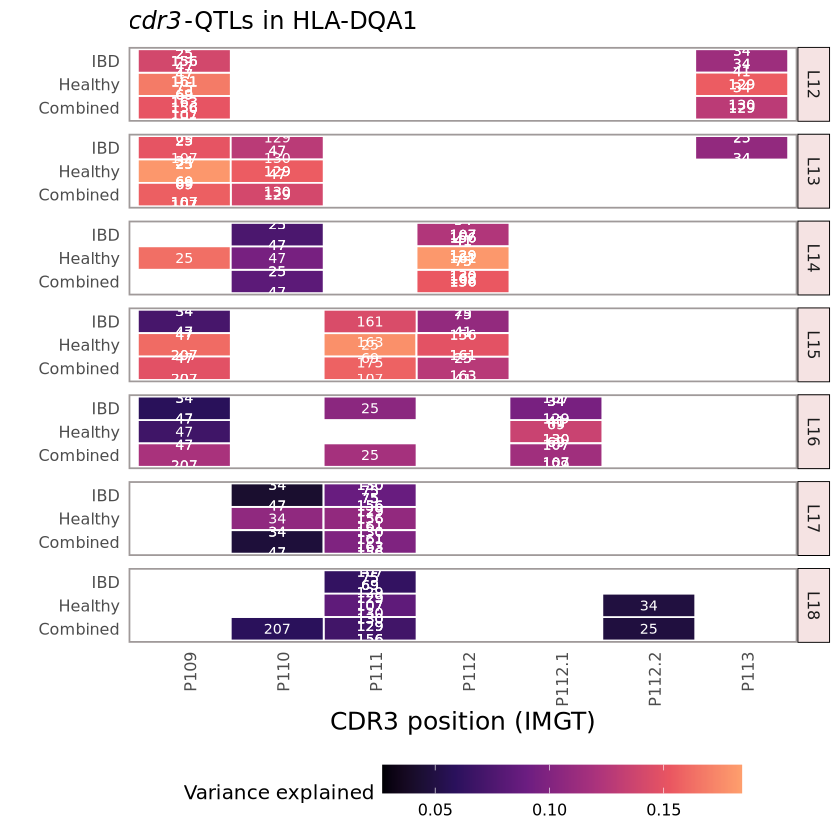

In [523]:
hla_gene <- 'DQA1'
cdr3qtl_map <- ggplot(cdr3qtls_for_plot %>% filter(HLA == hla_gene), 
        aes(y = Dataset, x = IMGT)) + 
    geom_tile(aes(fill = variance_explained), color = 'white', size = 0.5, linetype = 1) +
    geom_text(aes(label = cdr3qtls), color = "white", size = 3) +
    theme_minimal() +
    scale_fill_viridis_c(na.value = 'white', end = 0.8, option = 'magma') +
    labs(title = expression(paste(italic("cdr3"),"-QTLs in HLA-DQA1")), 
        x = "CDR3 position (IMGT)", 
        y = " ", 
        fill = 'Variance explained' )+
    theme(axis.text.x = element_text(angle = 90, hjust = 1), 
        axis.title = element_text(size = 15, hjust = 0.5),
        strip.background = element_rect(fill = "#f5e3e3"),
        legend.position = 'bottom',
        legend.justification = "center",
        legend.box.just = "center",
        panel.border = element_rect(color = "#a09a9a", fill = NA, linewidth = 1),  
        panel.spacing = unit(0.5, "lines"),
        panel.grid = element_blank(),
        axis.text.x.top = element_text(angle = 90, hjust = 0)
        ) +
    guides(fill=guide_colourbar(barwidth=15)) +
    facet_grid(Length_cdr3 ~ ., scales = 'free') 
cdr3qtl_map
ggsave(paste0('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/plots/',hla_gene,'_cdr3qtl_map_all_grids.pdf'), 
    cdr3qtl_map, dpi = 600, width = 15, height = 52, units = 'cm')

# PERMANOVA results

In [11]:
permanova_files <- list.files('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/conditional_analysis/permanova/DRB1/', 
    pattern = "\\.tsv$", 
    full.names = TRUE)
permanova_cond <- rbindlist(lapply(permanova_files, fread))

permanova_cond[, delta_aic := aic - aic[Site_hla == "null"], by = .(Length_cdr3, IMGT)]
permanova_min <- permanova_cond[
  , .SD[which.min(delta_aic)], 
  by = .(Length_cdr3, IMGT)
][Pvalue <= 0.00005][delta_aic <= -19]

In [ ]:
permanova_cond

In [12]:
permanova_min

Length_cdr3,IMGT,Df,SumOfSqs,R2,F,Pvalue,Site_hla,aic,variance_explained,pair,HLA,delta_aic
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
L12,P107,7,27.98229,0.03189848,8.966976,4.99975e-05,13,-1537.42876,0.03189848,L12_P107,DRB1,-37.48440
L12,P113,5,94.23671,0.01898037,7.379173,4.99975e-05,71,1799.87435,0.01898037,L12_P113,DRB1,-24.57500
L13,P107,7,18.25992,0.03907738,11.067102,4.99975e-05,13,-2756.56797,0.03907738,L13_P107,DRB1,-41.40008
L13,P108,4,119.10032,0.02316801,11.313247,4.99975e-05,70,1856.23009,0.02316801,L13_P108,DRB1,-19.74844
L14,P107,7,18.48300,0.03896193,11.033081,4.99975e-05,13,-2727.44902,0.03896193,L14_P107,DRB1,-41.92731
L14,P110,7,145.47595,0.03101849,8.711685,4.99975e-05,13,1671.28877,0.03101849,L14_P110,DRB1,-25.07320
L14,P112,7,54.77976,0.03446008,9.712769,4.99975e-05,13,-405.20780,0.03446008,L14_P112,DRB1,-26.97111
L14,P113,4,33.02060,0.02384081,11.649805,4.99975e-05,67,-653.91248,0.02384081,L14_P113,DRB1,-20.26002
L15,P107,7,22.60416,0.03485531,9.828189,4.99975e-05,13,-2121.16965,0.03485531,L15_P107,DRB1,-36.80427


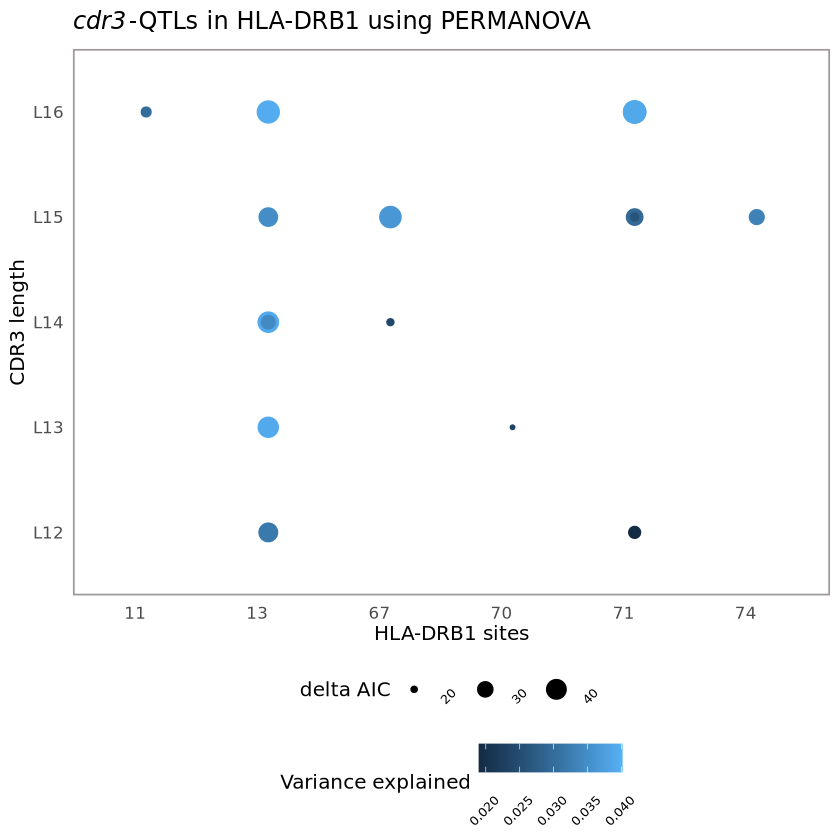

In [29]:
permanova_map <- ggplot(permanova_min %>% filter(HLA == 'DRB1'), 
        aes(y = Length_cdr3, x = Site_hla)) + 
    geom_point(aes(size = abs(delta_aic), color = variance_explained)) +
    #geom_text(aes(label = Site_hla), color = "white", size = 3) +
    theme_minimal() +
    scale_fill_viridis_c(na.value = 'white', end = 0.8, option = 'magma') +
    labs(title = expression(paste(italic("cdr3"),"-QTLs in HLA-DRB1 using PERMANOVA")), 
        x = "HLA-DRB1 sites", 
        y = "CDR3 length",
        size = 'delta AIC', 
        color = 'Variance explained' )+ 
    theme(axis.text.x = element_text(hjust = 1, vjust = 0.5), 
        axis.text = element_text(size = 10),
        axis.title = element_text(size = 12, hjust = 0.5, vjust = 5),
        strip.background = element_rect(fill = "#f5e3e3"),
        legend.position = 'bottom',
        legend.text = element_text(angle = 45, size = 8, hjust = 0.5, vjust = 0.2),
        legend.justification = "center",
        legend.box = "vertical",
        panel.border = element_rect(color = "#a09a9a", fill = NA, linewidth = 1),  
        panel.spacing = unit(0.5, "lines"),
        panel.grid = element_blank(),
        axis.text.x.top = element_text(angle = 90, hjust = 0)
        ) +
    guides(fill=guide_colourbar(barwidth=15)) #+
    #facet_grid(Length_cdr3 ~ ., scales = 'free') 
permanova_map

In [30]:
ggsave('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/plots/drb1_permanova_map_cdr3QTLs.pdf', 
    permanova_map, dpi = 600, width = 11, height = 10, units = 'cm')

# cdr3-QTLs with Emerson dataset

In [202]:
emerson <- na.omit(fread('/work_beegfs/sukmb667/projects/cdr3-qtl/Emerson_DeWitt/conditional/DRB1_conditional_round_5.tsv'))
emerson  %>% 
    group_by(Length_cdr3) %>% 
    filter(Pvalue == min(Pvalue)) %>% 
    filter(variance_explained == max(variance_explained)) %>%
    mutate(Dataset = 'Emerson') %>%
    ungroup() %>% unique()

Res.Df,Df,Gen.var.,Pillai,approx F,num Df,den Df,Pvalue,Omnibus,model,P_val,variance_explained,Length_cdr3,IMGT,condition,Dataset
<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
493,-8,0.6553668,0.4936119,1.581502,160,3848,6.801500e-06,0.2075654,full,0,0.018823212,L12,P113,13_71_60_74_32_86,Emerson
491,-8,0.5077492,0.4649628,1.477877,160,3832,1.202659e-04,0.2481068,full,0,0.016853661,L13,P109,13_67_70_71_74_86,Emerson
492,-2,0.5252607,0.1516055,1.943876,40,948,4.847383e-04,0.2504406,full,0,0.004923148,L14,P112,13_67_70_86_74_58,Emerson
491,-3,0.4477735,0.2194680,1.870646,60,1422,8.408513e-05,0.2440951,full,0,0.009996490,L15,P111,13_67_71_30_86_74,Emerson
489,-4,0.5265030,0.2821749,1.794984,80,1892,2.906151e-05,0.2095697,full,0,0.010412218,L16,P112.1,13_71_32_74_86_67,Emerson
491,-8,0.6118547,0.4357205,1.379577,160,3832,1.356024e-03,0.1720391,full,0,0.016347767,L17,P111,13_67_70_71_74_86,Emerson
495,-3,0.7537754,0.2120647,1.817957,60,1434,1.730408e-04,0.1232947,full,0,0.010371710,L18,P109,13_70_30_86_74_57,Emerson


## Compare our signals with results of Ishigaki

In [193]:
ishigaki <- fread('/work_beegfs/sukmb667/projects/cdr3-qtl/cdr3qtl_MVML_amino_acid_geno_all_results.rm_gl.txt')

In [226]:
drb1_sites <- ishigaki %>% 
    filter(HLA == 'DRB1', Site_hla > 0, Pvalue <= bonf) %>% 
    pull(Site_hla) %>% unique()
dqb1_sites <- ishigaki %>% 
    filter(HLA == 'DQB1', Site_hla > 0, Pvalue <= bonf) %>% 
    pull(Site_hla) %>% unique()
dqa1_sites <- ishigaki %>% 
    filter(HLA == 'DQA1', Site_hla > 0, Pvalue <= bonf) %>% 
    pull(Site_hla) %>% unique()
b_sites <- ishigaki %>% 
    filter(HLA == 'B', Site_hla > 0, Pvalue <= bonf) %>% 
    pull(Site_hla) %>% unique()

In [246]:
bonf

[1] 4.638219e-07

In [294]:
manova_dt <- fread('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/manova_results/main_manova_as_in_Ishigaki.tsv')
manova_dt <- rename(manova_dt, Pvalue = grep('Pr', names(manova_dt), value = TRUE))
sig_manova <- manova_dt[Pvalue <= bonf]


In [324]:
uniqueN(manova_dt$pair) # number of all tests
uniqueN(sig_manova$pair) # number of significant associations
manova_summary_stat_dt <- sig_manova %>% group_by(Position_cdr3) %>% summarise(n_sig_ass = length(unique(pair)))
manova_summary_stat_dt


[1] 26880

[1] 9533

Position_cdr3,n_sig_ass
<chr>,<int>
P105,1
P106,369
P107,811
P108,1192
P109,1509
P110,1201
P111,843
P111.1,338
P112,827


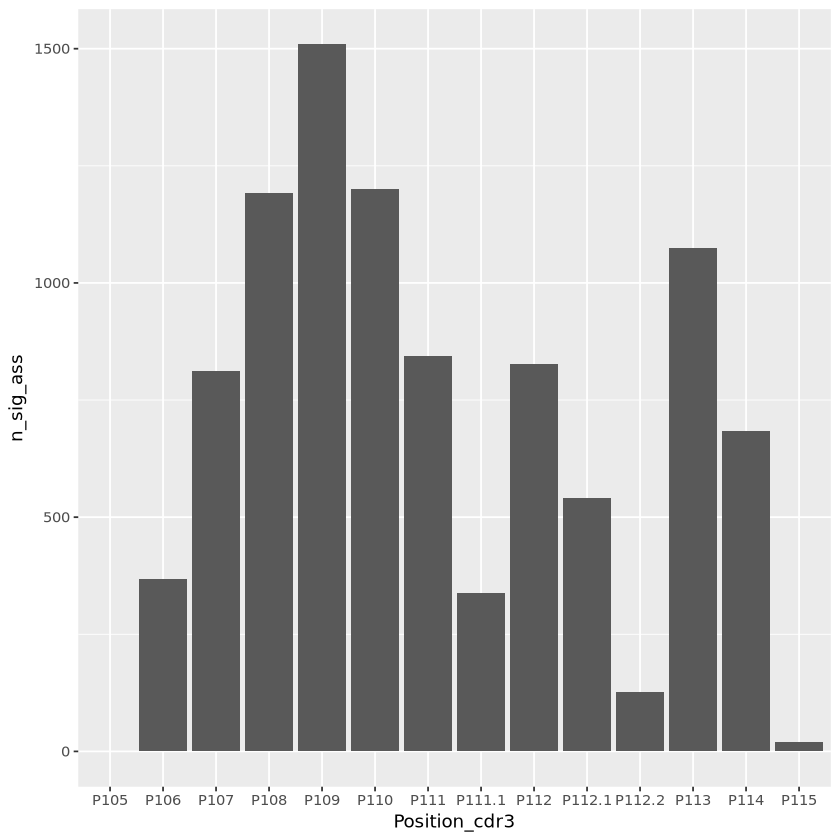

In [327]:
ggplot(manova_summary_stat_dt, aes(x = Position_cdr3, y = n_sig_ass))+
    geom_col()

In [329]:
(1509+1192+1201+1074)/9522

[1] 0.5225793

In [279]:
x <- sort(dqa1_sites)
#novel_sites[novel_sites$HLA == 'DRB1', 'Site_hla']
y <- sort(as.numeric(unique(healthy_manova[HLA == 'DQA1', Site_hla])))
setdiff(y,x)

numeric(0)

# Novel sites in POWER Analysis

In [45]:
smallest_number <- .Machine$double.xmin

In [235]:
power_manova_dt <- fread("/work_beegfs/sukmb667/projects/cdr3-qtl/TCellData/power_analysis/manova_power_all.tsv")
power_manova_dt <- power_manova_dt %>% 
    rename('Pvalue' = grep('Pr', names(power_manova_dt), value = TRUE)) %>%
    separate(pair, into = c('HLA', 'Site_hla', 'Length_cdr3', 'Position_cdr3'), sep = '_', remove = FALSE) %>% as.data.table()
power_manova_dt <- power_manova_dt[,
    Pvalue := ifelse(Pvalue == 0, smallest_number, Pvalue)]
bonf <- 0.01 / uniqueN(power_manova_dt[size == 1188]$pair)
hla_genes <- c('DRB1', 'DQA1', 'DQB1', 'B')
power_manova_dt <- power_manova_dt[replic == 2][HLA %in% hla_genes]

In [95]:
power_sizes <- sort(unique(power_manova_dt$size))
print(power_sizes)

[1]  400  600  800 1188


In [115]:
power_manova_dt$novel_sites <- NA

In [208]:
symdiff(c(1,2,3), c(3,4,5))

[1] 1 2 4 5

In [221]:
hla_sites_size <- function(dt, s, g){
    power_manova_dt[size == s][HLA == g] %>% 
    group_by(HLA) %>% 
    filter(Pvalue <= bonf) %>% 
    pull(Site_hla) %>% unique() %>% as.numeric()
}

first <- TRUE

for (gene in hla_genes){
    for (i in seq(4,2)){
        size <- power_sizes[i]
        novel <- symdiff(hla_sites_size(power_manova_dt, size, gene), hla_sites_size(power_manova_dt, power_sizes[i-1], gene))
        if (length(novel) == 0){
            next
        }
        novel_sites_size <- data.frame(size = size, HLA = gene,  Site_hla = novel)
        if (first){
            novel_sites <- novel_sites_size
            first <- FALSE
        } else {
            novel_sites <- rbind(novel_sites, novel_sites_size)
        }
    }
}
novel_sites$novelty <- 'novel'
novel_sites


size,HLA,Site_hla,novelty
<int>,<chr>,<dbl>,<chr>
1188,DRB1,98,novel
1188,DRB1,104,novel
1188,DRB1,112,novel
800,DRB1,16,novel
800,DRB1,86,novel
800,DRB1,233,novel
600,DRB1,32,novel
600,DRB1,33,novel
600,DRB1,140,novel


In [164]:
dt_plot <- merge(power_manova_dt, novel_sites, by = c('size', 'HLA', 'Site_hla'), all.x = TRUE)


In [165]:
dt_plot <- dt_plot %>% mutate(novelty = ifelse(is.na(novelty), 'known', novelty))

Warning message:
“Removed 33600 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


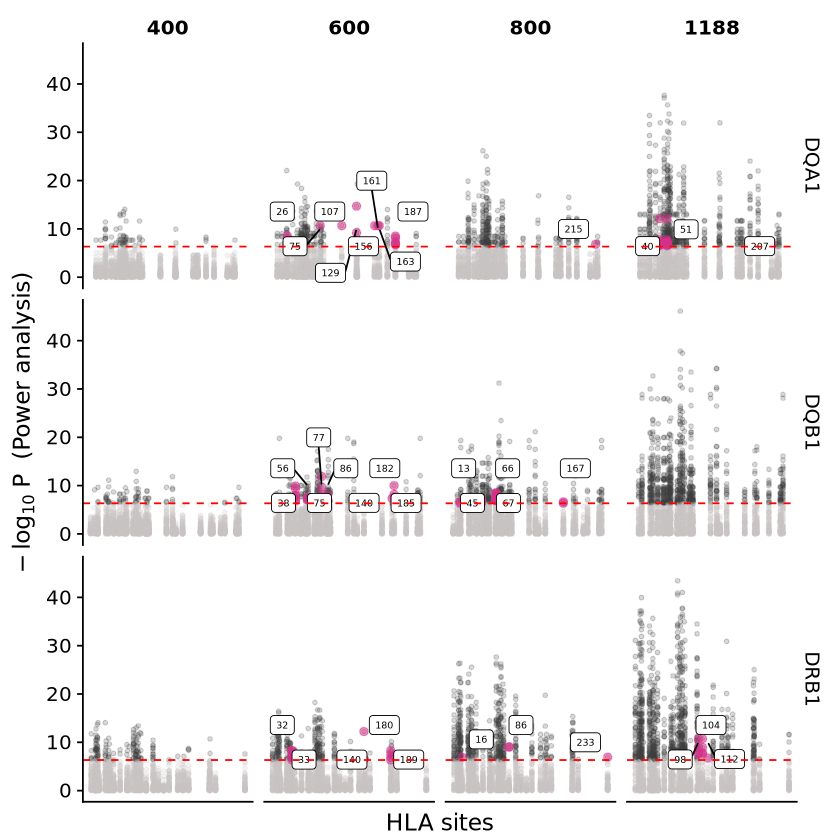

In [191]:
pl <- ggplot() +
    geom_point(data = dt_plot, aes(x = as.numeric(Site_hla), y = -log10(Pvalue), color = ifelse(Pvalue <= bonf, 'significant', 'not_significant')), 
        alpha=0.2, size=1, show.legend = FALSE) +
    scale_color_manual(values = c('significant' = '#3f3d3d', 'not_significant' = '#c9c6c6')) +
    new_scale_color() +
    geom_point(data = dt_plot %>% filter(Pvalue <= bonf, novelty == 'novel'), 
        aes(x = as.numeric(Site_hla), y = -log10(Pvalue), color = novelty), 
        alpha=0.5, size=2, show.legend = FALSE) +
    ggrepel::geom_label_repel(data = novel_sites, aes(x = as.numeric(Site_hla), y = 10, label = Site_hla), angle = 90, size = 2, color = 'black') +
    scale_color_manual(values = c('known' = 'black', 'novel' = '#d63189' )) +
    labs(x = "HLA sites", y = expression(paste(-log[10], " ", P, "  (Power analysis)"))) +
    geom_hline(yintercept= - log10(bonf), linetype="dashed", color = "red") +
    theme(legend.position = "none") +
    theme_cowplot() +
    facet_grid(HLA ~ size, space = "free") +
    theme(axis.text.x = element_blank(), 
        #axis.title.x = element_text(vjust = -1, margin = margin(t = 15)),
        strip.background = element_rect(fill = "white"),
        strip.text.x = element_text(size = 12, face = 'bold'),
        axis.ticks.x = element_blank()) 
pl

In [192]:
ggsave(paste0('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/plots/IBD_dataset_power_analysis.pdf'), 
    pl, width = 30, height = 15, dpi = 600, units = 'cm')

Warning message:
“Removed 33600 rows containing missing values or values outside the scale range (`geom_point()`).”
